In [1]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
%pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 56991, done.
remote: Counting objects: 100% (1171/1171), done.
remote: Compressing objects: 100% (621/621), done.
remote: Total 56991 (delta 736), reused 770 (delta 444), pack-reused 55820
Receiving objects: 100% (56991/56991), 39.38 MiB | 33.43 MiB/s, done.
Resolving deltas: 100% (40981/40981), done.
/teamspace/studios/this_studio/diffusers


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Processing /teamspace/studios/this_studio/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1984953 sha256=f78216a98dba8a2c5e773ae6b42273f4ff7cae1023a04eee1e8647cede724e8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zdl6syj/wheels/ca/bf/55/fa6adb8b1e4a586e8231f410fcfa27a3f519e4163c92f9b53d
Successfully built diffusers
Note: you may need to restart the kernel to use updated packages.


In [6]:
from accelerate.utils import write_basic_config

write_basic_config()


PosixPath('/teamspace/studios/this_studio/.cache/huggingface/accelerate/default_config.yaml')

In [7]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

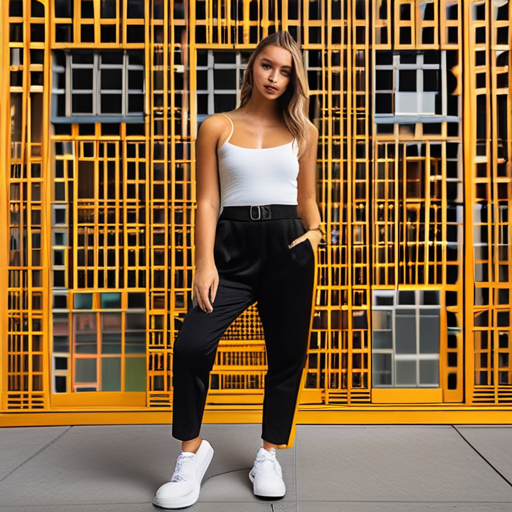

In [17]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
).to("cuda")

prompt = "High-resolution, full-body photograph of a beautiful girl, suitable for a popular Instagram post. Fashion-forward and set against an urban backdrop, capturing the contemporary and vibrant energy of Instagram's aesthetics."
image = pipeline_text2image(prompt=prompt, height = 512, width = 512, strength = 0.2, negative_prompt=["(worst quality:1.2), (bad quality:1.2), (poor quality:1.2), (missing fingers:1.2), bad-artist-anime, bad-artist, bad-picture-chill-75v, badhandv4, bad_prompt_version2, ng_deep_negative_v1_75t"]).images[0]
image

In [ ]:
import requests

from PIL import Image

from io import BytesIO

from diffusers import StableDiffusionUpscalePipeline

import torch

# load model and scheduler

model_id = "stabilityai/stable-diffusion-x4-upscaler"

pipeline = StableDiffusionUpscalePipeline.from_pretrained(

    model_id, revision="fp16", torch_dtype=torch.float16

)

pipeline = pipeline.to("cuda")

# let's download an  image

# url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"

# response = requests.get(url)

# low_res_img = Image.open(BytesIO(response.content)).convert("RGB")

# low_res_img = low_res_img.resize((512, 512))

prompt = "High-resolution, full-body photograph of a beautiful girl, suitable for a popular Instagram post. Fashion-forward and set against an urban backdrop, capturing the contemporary and vibrant energy of Instagram's aesthetics."

upscaled_image = pipeline(prompt=prompt, image=image)

upscaled_image

In [27]:
import pickle

for i, image_array in enumerate(upscaled_image.images):
    # Convert the NumPy array to a PIL image
    image = image_array
    image
    # Save the image
    image.save(f"output_image_{i}.png")

In [23]:
image

[<PIL.Image.Image image mode=RGB size=2048x2048>]

In [2]:
from diffusers import PixArtAlphaPipeline
import torch
# from diffusers import Transformer2DModel

In [3]:
# for comparison

pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-1024-MS", torch_dtype=torch.float16)
pipe = pipe.to('cuda')

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing Transformer2DModel: 
 ['caption_projection.y_embedding']


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/20 [00:00<?, ?it/s]

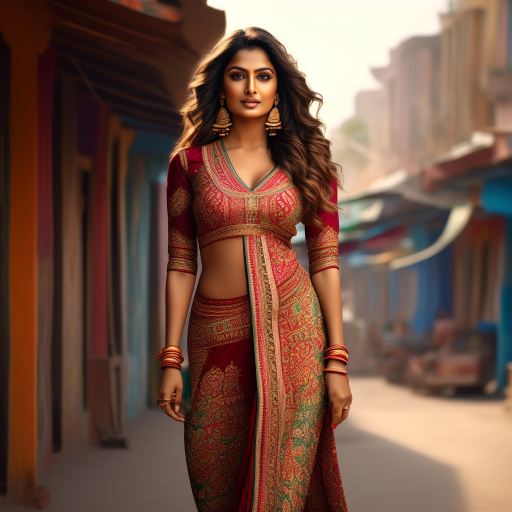

In [29]:
prompt = " Full body photograph of a modern Indian woman for a social media post, full length, ultra realistic, concept art, intricate details, casual salwaar kameez, highly detailed, photorealistic, summer render, urban backdrop" # Your prompt here
neg_prompt = "(worst quality:1.2), (bad quality:1.2), (poor quality:1.2), (missing fingers:1.2), bad-artist-anime, bad-artist, bad-picture-chill-75v, badhandv4, bad_prompt_version2, ng_deep_negative_v1_75t,distorted face, distorted body, close up, historic" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt,height = 512, width = 512).images[0]
image

In [18]:
import requests

from PIL import Image

from io import BytesIO

from diffusers import StableDiffusionUpscalePipeline

import torch

# load model and scheduler

model_id = "stabilityai/stable-diffusion-x4-upscaler"

pipeline = StableDiffusionUpscalePipeline.from_pretrained(

    model_id, revision="fp16", torch_dtype=torch.float16

)

pipeline = pipeline.to("cuda")

# let's download an  image

# url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"

# response = requests.get(url)

# low_res_img = Image.open(BytesIO(response.content)).convert("RGB")

# low_res_img = low_res_img.resize((512, 512))

prompt = "High-resolution, full-body photograph of a beautiful girl, suitable for a popular Instagram post. Fashion-forward and set against an urban backdrop, capturing the contemporary and vibrant energy of Instagram's aesthetics."

upscaled_image = pipeline(prompt=prompt, image=image)

upscaled_image


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/75 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.00 GiB. GPU 0 has a total capacity of 22.18 GiB of which 3.91 GiB is free. Process 59364 has 18.27 GiB memory in use. Of the allocated memory 16.81 GiB is allocated by PyTorch, and 1.14 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [55]:
import torch
from diffusers import StableDiffusionSAGPipeline

pipe = StableDiffusionSAGPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "High-resolution, full-body photograph of a beautiful girl, suitable for a popular Instagram post. Fashion-forward and set against an urban backdrop, capturing the contemporary and vibrant energy of Instagram's aesthetics" # Your prompt here
neg_prompt = "(bad anatomy:1.2),(worst quality:1.2), (bad quality:1.2), (missing fingers:1.2), bad-artist-anime, bad-artist, bad-picture-chill-75v, badhandv4, ugly face, bad_prompt_version2, ng_deep_negative_v1_75t, distorted face, bad anatomy, invisible face" # Negative prompt here

image = pipe(prompt=prompt,negative_prompt = neg_prompt, height=512, width=512,sag_scale=0.75).images


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/50 [00:00<?, ?it/s]

In [43]:
import requests

from PIL import Image

from io import BytesIO

from diffusers import StableDiffusionUpscalePipeline

import torch

model_id = "stabilityai/stable-diffusion-x4-upscaler"

pipeline = StableDiffusionUpscalePipeline.from_pretrained(

    model_id, revision="fp16", torch_dtype=torch.float16

)

pipeline = pipeline.to("cuda")


prompt = "High-resolution, full-body photograph of a beautiful girl, suitable for a popular Instagram post. Fashion-forward and set against an urban backdrop, capturing the contemporary and vibrant energy of Instagram's aesthetics."

upscaled_image = pipeline(prompt=prompt, image=image)

upscaled_image


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/75 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=2048x2048 at 0x7FBD73F55DB0>], nsfw_content_detected=None)

In [44]:
import pickle

for i, image_array in enumerate(upscaled_image.images):
    # Convert the NumPy array to a PIL image
    image = image_array
    image
    # Save the image
    image.save(f"output_SaG_image_{i}.png")